<a href="https://colab.research.google.com/github/sourabh-bhide/SyntheticHealthData/blob/main/Diabetes_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://biolib.com/shd2020/Diabetes-Machine-Learning-Data/

In [3]:
import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('NO GPU access. Check runtime settings') 
else:
  !nvidia-smi

NO GPU access. Check runtime settings


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load Data

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
real_data = pd.read_csv('/content/gdrive/MyDrive/Diabetes-Machine-Learning-Data/data/real_data.csv')
synthetic_data = pd.read_csv('/content/gdrive/MyDrive/Diabetes-Machine-Learning-Data/data/synthetic_data.csv')

In [4]:
#define function for classifying patients based on readmittance
def f(row):
    if row['readmitted'] == '<30':
        val = 1
    elif row['readmitted'] == '>30':
        val = 2
    else:
        val = 3
    return val

#create new column 'Good' using the function above
synthetic_data['readmitted_num'] = synthetic_data.apply(f, axis=1)
real_data['readmitted_num'] = real_data.apply(f, axis=1)

# Train a model to predic readmittance using Synthetic Data

Problem statement : Using all the feature predict the target variable "readmitted" 

In [7]:
df = synthetic_data.copy()
df.head(3)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,_diag_1,_diag_2,_diag_3
0,Caucasian,Female,[60-70),3,40,0,14,0,1,1,9,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30,Supplemental classification,Diseases of the skin and subcutaneous tissue,"Endocrine, nutritional, and metabolic diseases..."
1,Caucasian,Male,[50-60),5,40,0,5,0,0,0,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Injury and poisoning,Diabetes mellitus,Diseases of the circulatory system
2,Caucasian,Female,[50-60),1,43,0,23,0,0,3,9,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,Diseases of the circulatory system,Diseases of the skin and subcutaneous tissue,Injury and poisoning


# Split the dataframe into train, validation, and test

In [9]:
train, test = train_test_split(df, test_size=0.2)
print(len(train), 'train examples')
print(len(test), 'test examples')

62752 train examples
15689 test examples


# Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78441 entries, 0 to 78440
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      78441 non-null  object
 1   gender                    78441 non-null  object
 2   age                       78441 non-null  object
 3   time_in_hospital          78441 non-null  int64 
 4   num_lab_procedures        78441 non-null  int64 
 5   num_procedures            78441 non-null  int64 
 6   num_medications           78441 non-null  int64 
 7   number_outpatient         78441 non-null  int64 
 8   number_emergency          78441 non-null  int64 
 9   number_inpatient          78441 non-null  int64 
 10  number_diagnoses          78441 non-null  int64 
 11  max_glu_serum             78441 non-null  object
 12  A1Cresult                 78441 non-null  object
 13  metformin                 78441 non-null  object
 14  repaglinide           

In [11]:
df.diabetesMed.unique()

array(['None', 'Norm', '>300', '>200'], dtype=object)

In [12]:
#check for null entries
print('Train columns with null values:\n', train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test.isnull().sum())
print("-"*10)

Train columns with null values:
 race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizi

There are no null or NaNs in the dataset

Text(0.5, 1.0, 'synthetic data')

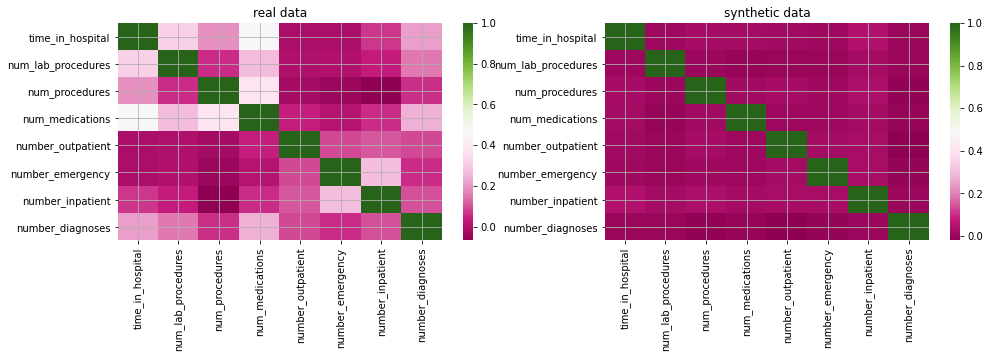

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(16,4))

sns.heatmap(real_data.corr(),cmap='PiYG',annot=False,ax=axs[0])
axs[0].grid()
axs[0].set_title('real data')

sns.heatmap(synthetic_data.corr(),cmap='PiYG',annot=False,ax=axs[1])
axs[1].grid()
axs[1].set_title('synthetic data')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

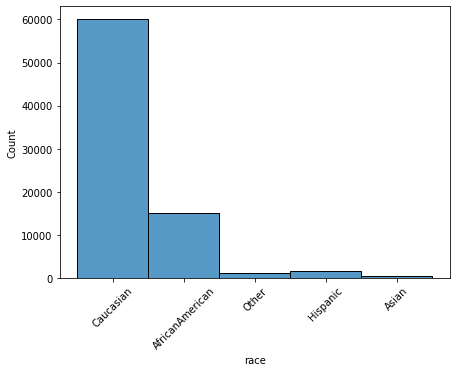

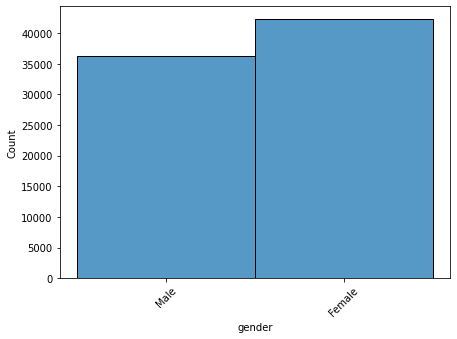

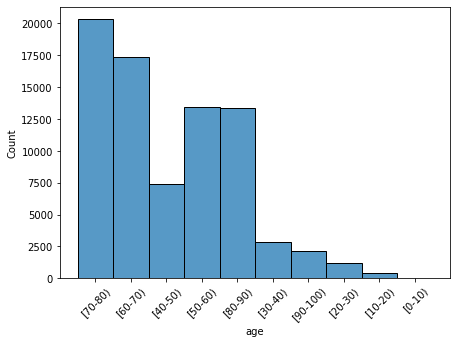

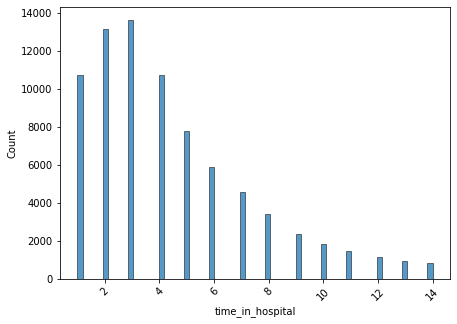

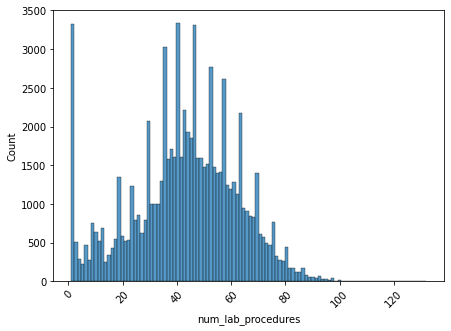

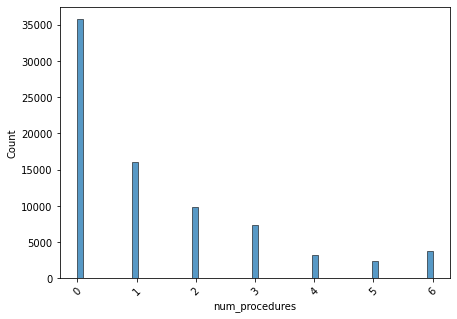

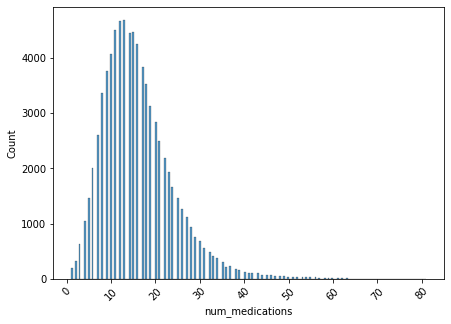

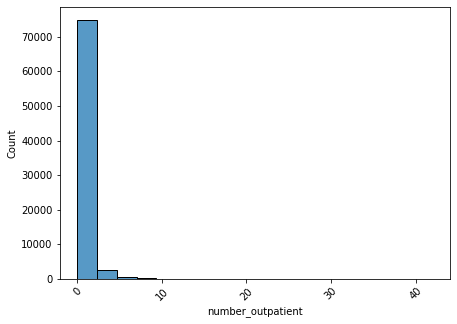

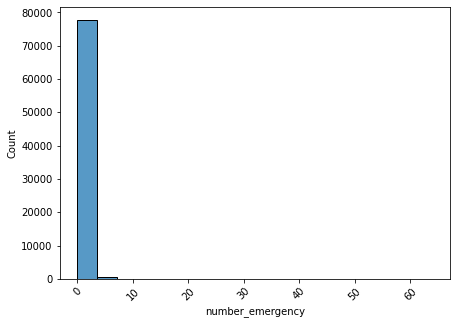

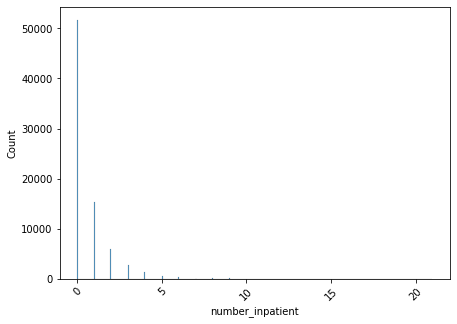

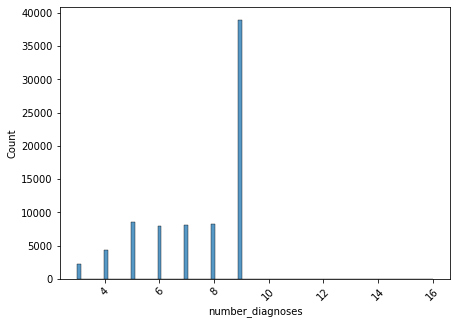

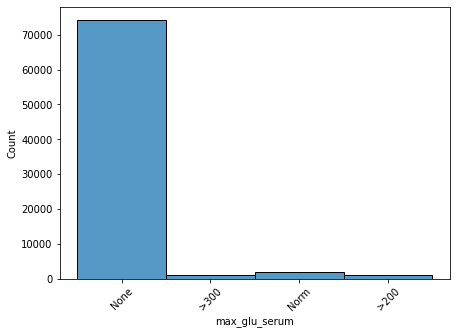

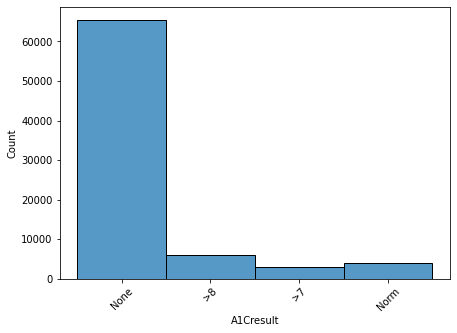

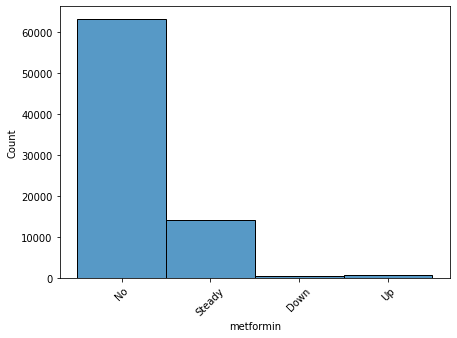

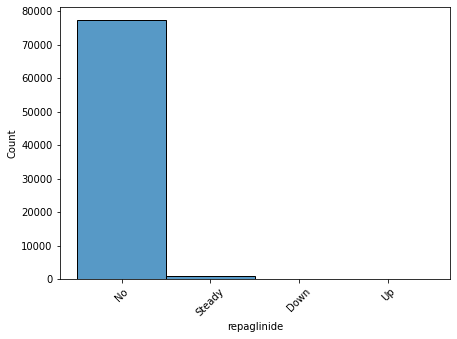

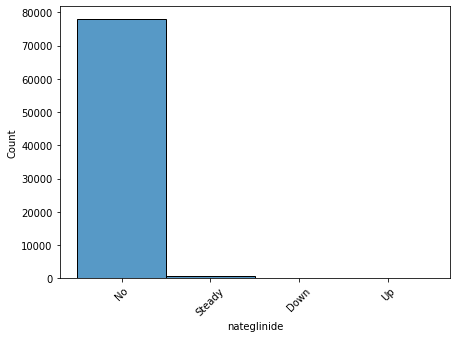

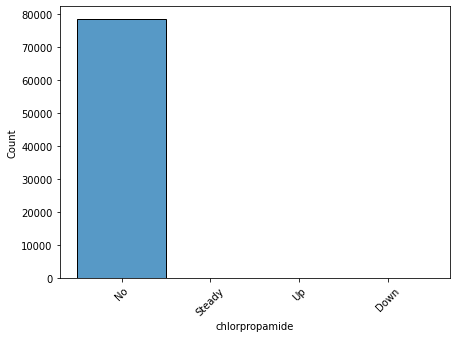

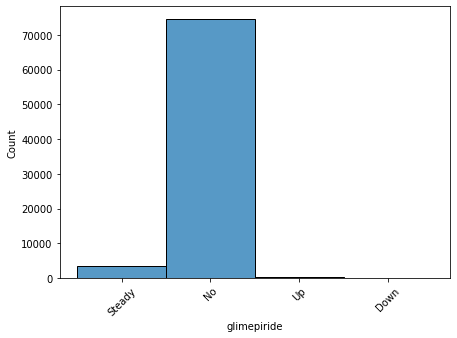

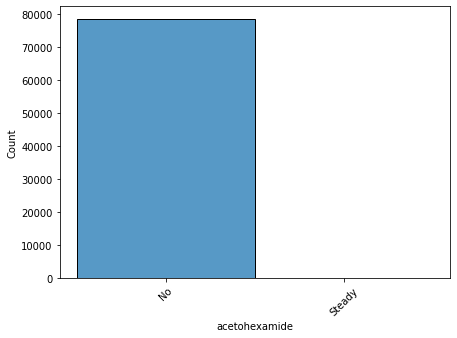

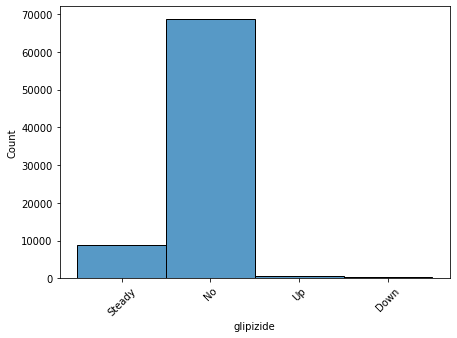

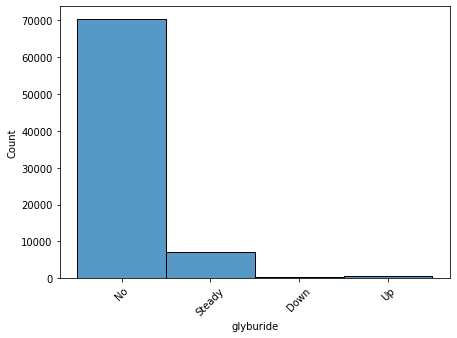

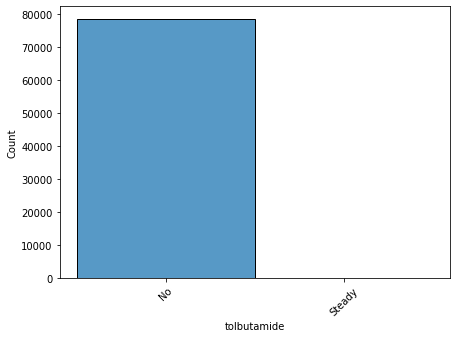

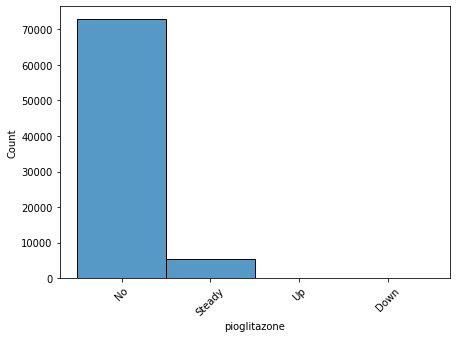

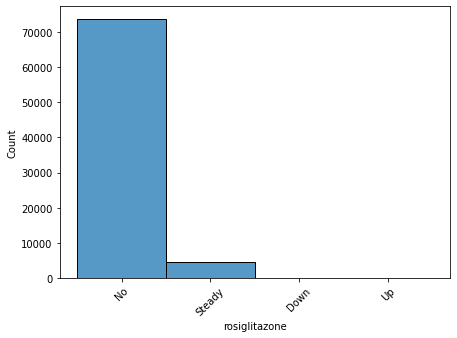

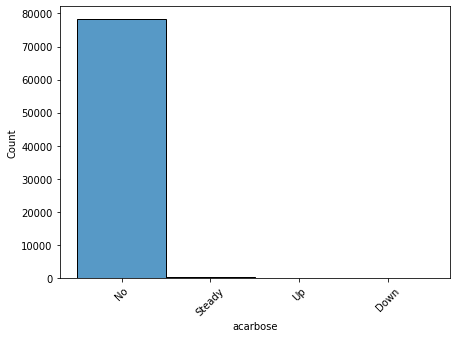

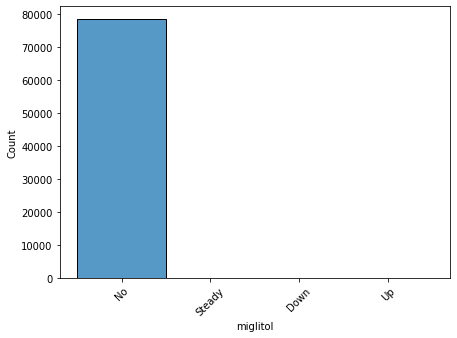

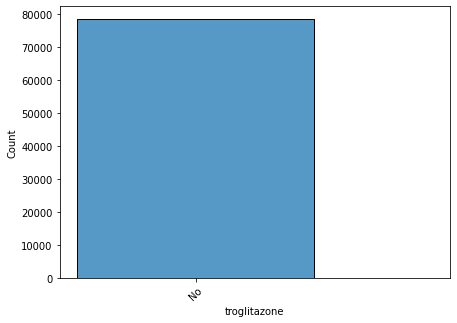

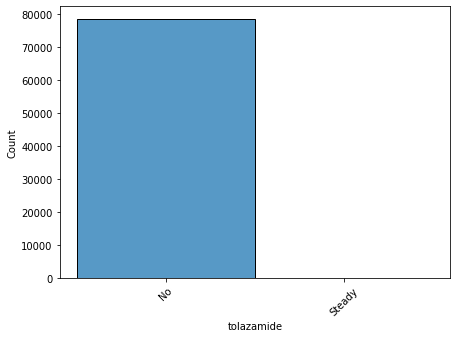

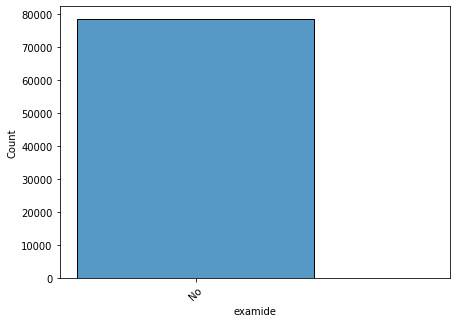

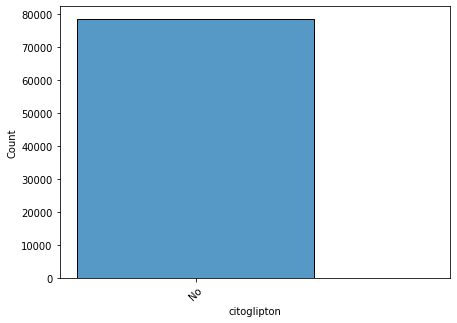

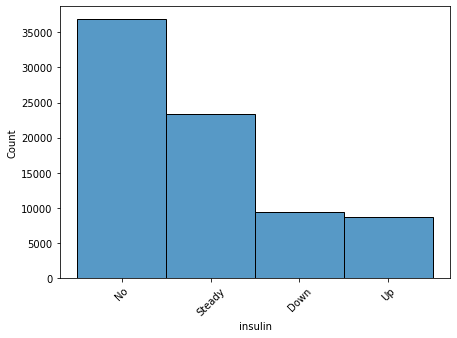

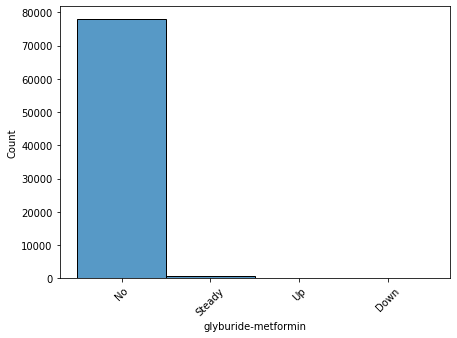

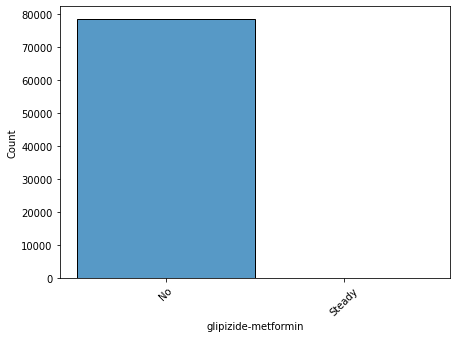

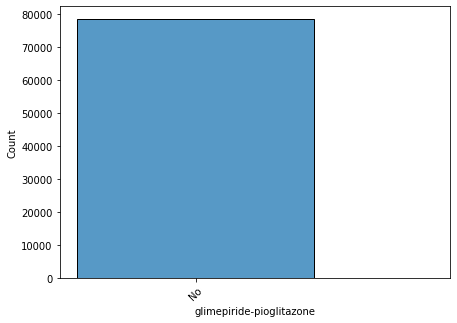

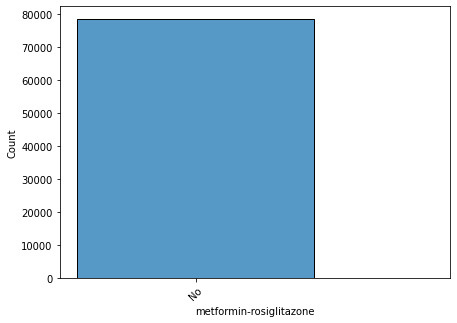

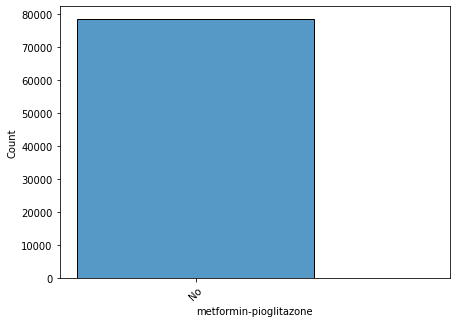

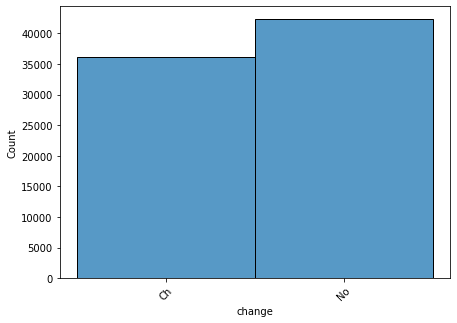

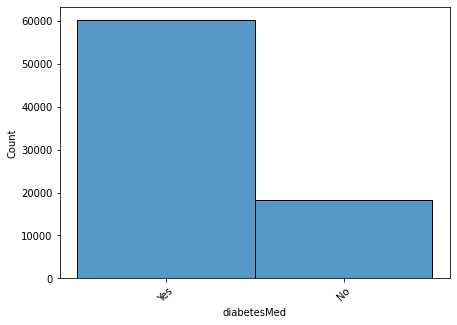

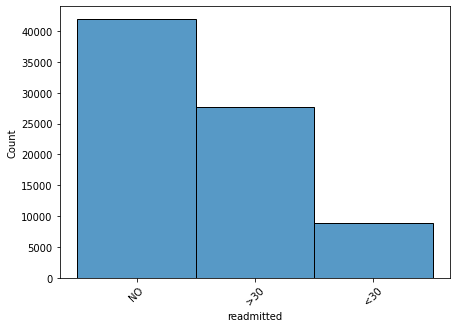

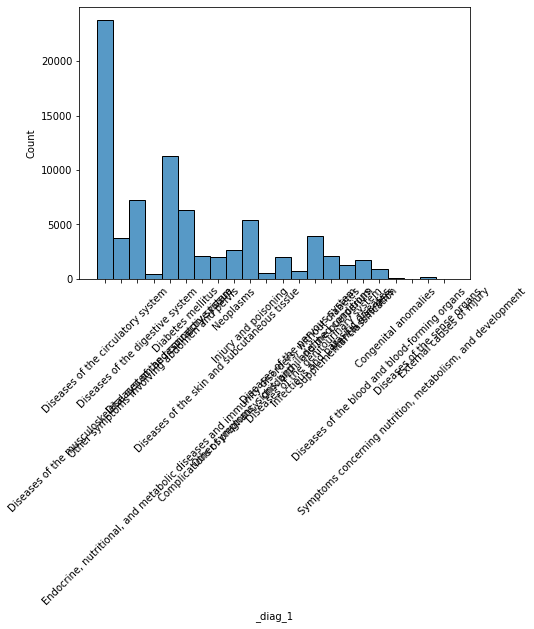

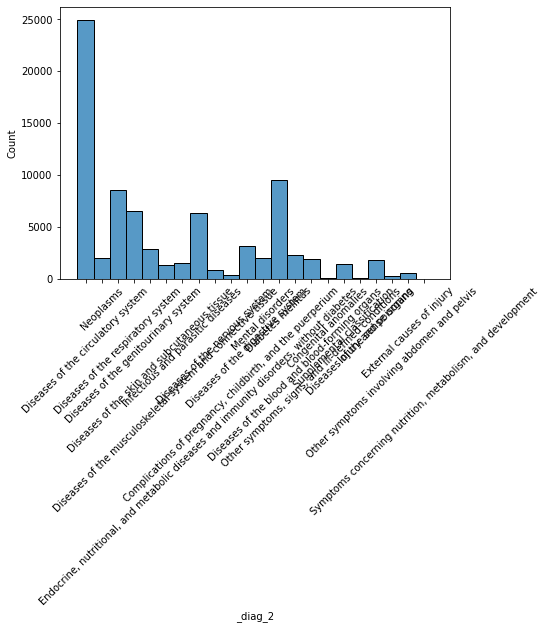

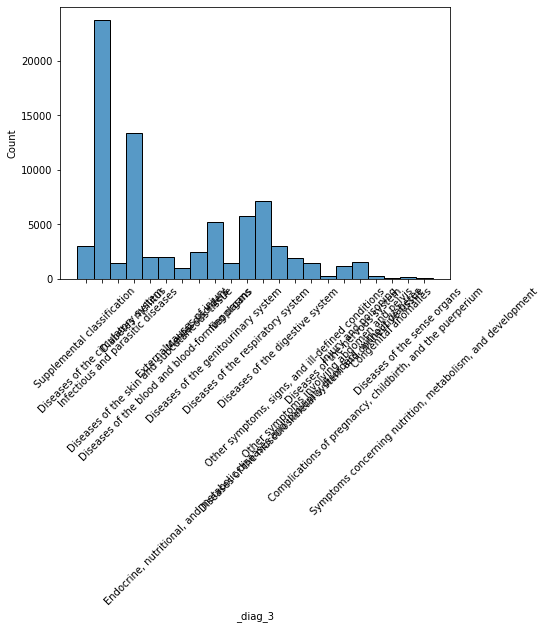

In [90]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

def create_histogram(df,feature):
  f, ax = plt.subplots(figsize=(7, 5))
  ax.tick_params(axis='x', labelrotation=45)
  sns.histplot(data=df, x=feature)
for column in df.columns: create_histogram(real_data,column)
#widgets.interact(create_histogram, df=['real_data','synthetic_data'], feature=df.columns)

Majority of the patients are Caucasians and above the age of 50 years

In [89]:
df.troglitazone.unique()

array(['No'], dtype=object)

These columns add no information : troglitazone , examide , citoglipton , metformin-rosiglitazone , metformin-pioglitazone, 

# Using AutoML

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak
from autokeras import StructuredDataClassifier


In [ ]:
train = train.drop(columns='readmitted')

x_train = train.drop(columns='readmitted_num')
y_train = train['readmitted_num']

input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=True)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node, 
    overwrite=True,
    max_trials=20)
clf.fit(x_train, y_train, epochs=40)

Trial 20 Complete [00h 01m 55s]
val_loss: 0.6795052886009216

Best val_loss So Far: 0.6533282399177551
Total elapsed time: 01h 02m 17s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
1569/1569 [==============================] - 6s 3ms/step - loss: 0.8809 - accuracy: 0.6073
Epoch 2/50
1569/1569 [==============================] - 4s 3ms/step - loss: 0.7663 - accuracy: 0.6747
Epoch 3/50
1569/1569 [==============================] - 4s 2ms/step - loss: 0.7409 - accuracy: 0.6848
Epoch 4/50
1569/1569 [==============================] - 4s 2ms/step - loss: 0.7254 - accuracy: 0.6911
Epoch 5/50
1569/1569 [==============================] - 4s 2ms/step - loss: 0.7146 - accuracy: 0.6942
Epoch 6/50
1569/1569 [==============================] - 5s 3ms/step - loss: 0.7060 - accuracy: 0.6993
Epoch 7/50
1569/1569 [==============================] - 4s 3ms/step - loss: 0.6997 - accuracy: 0.7011
Epoch 8/50
1569/1569 [==============================] - 4s 2ms/step - loss: 0.6939 - accuracy: 0.7024
Epoch 9/50


In [ ]:
test = test.drop(columns='readmitted')

x_test = test.drop(columns='readmitted_num')
y_test = test['readmitted_num']

predicted_y = clf.predict(x_test)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test,y_test))

In [ ]:
model = clf.export_model()
model.summary()

In [ ]:
real_data = real_data.drop(columns='readmitted')
x_real_data = real_data.drop(columns='readmitted_num')
y_real_data = real_data['readmitted_num']
print(clf.evaluate(x_real_data,y_real_data))